# What Music Do UWaterloo Students Listen To?

An expoloratory data anlysis (EDA) of the type of music UWaterloo students listen to. Self-reported data was collected from roughly 400 UW students.


In [1]:
# adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.colors import ListedColormap

In [2]:
# dataset
df = pd.read_csv('responses-data.csv')

# font for graphs
font_path = 'fonts/Lexend/static/Lexend-Medium.ttf'
fontManager.addfont(font_path)
prop = FontProperties(fname=font_path)
sns.set(font=prop.get_name())

# colour palette for all visualizations

# add custom color palette once design idea is finished ---------
my_palette = ["#849de9", "#C76881", "#A46BCB", 
              "#92A753", "#326bbf", "#A46BCB", "#DA91D7"]
sns.set_palette(my_palette)
custom_palette  = ListedColormap(my_palette)

#sns.set_palette("hls") # remove later

## Do UW students listen to music when studying?

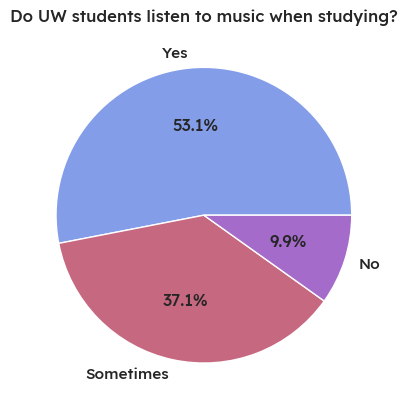

In [3]:
# extract data from related column
col_name = "Do you listen to music when you study?"
music_study_data = df[col_name].value_counts()

# create pie graph
plt.pie(music_study_data, labels=music_study_data.index, autopct='%1.1f%%')
plt.title('Do UW students listen to music when studying?')
plt.show()

It looks like the majority of students prefer to listen to music when they study!

## What music streaming services do UW students use?

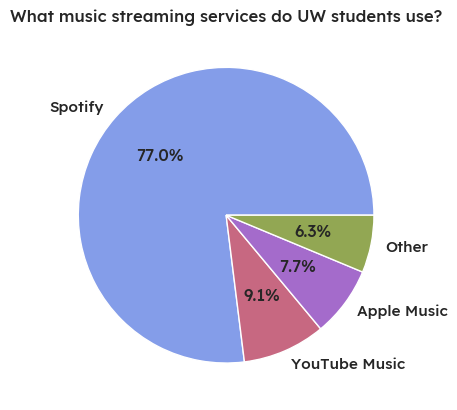

In [4]:
# extract data from related column
col_name = "What music streaming service do you primarily use?"

# replace all other answers to 'Other'
streaming_services = ['Spotify', 'Apple Music', 'YouTube Music']
df[col_name] = df[col_name].where(df[col_name].isin(streaming_services), 'Other')

streaming_service_data = df[col_name].value_counts()

# create pie graph
plt.pie(streaming_service_data, labels=streaming_service_data.index, autopct='%1.1f%%')
plt.title('What music streaming services do UW students use?')
plt.show()

Looks like the vast majority of UWaterloo students primarily use Spotify as their streaming service! Some of the popular "Other" answers included CDs and Pirated Music.

## Who are UW's favorite artists/bands?

In [ ]:
# extract data from related column
col_name = "Who is your favourite artist/band right now?"
fav_artists_data = df[col_name]

# clean up responses
fav_artists_data = fav_artists_data.str.rstrip()
fav_artists_data_caps = fav_artists_data.str.upper()

# convert data to strings
fav_artists_data_caps = fav_artists_data_caps.astype(str)

# break up into distinct artists/bands
artists = fav_artists_data_caps.tolist()

# count the frequency of each artist
artist_counts = {}
for artist in artists:
    if artist in artist_counts:
        artist_counts[artist] += 1
    else:
        artist_counts[artist] = 1

# remove all the "nan" entries
artist_counts['nan'] = 0
        
# create word cloud
wordcloud = WordCloud(width=600, height=600, background_color=None, colormap=custom_palette).generate_from_frequencies(artist_counts)

# display word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The results show us that The Weeknd, Taylor Swift, NewJeans, Radiohead, BTS, and Kanye West are some the favorite artists/bands among the UWaterloo student body!

## What are UW's favorite songs right now?

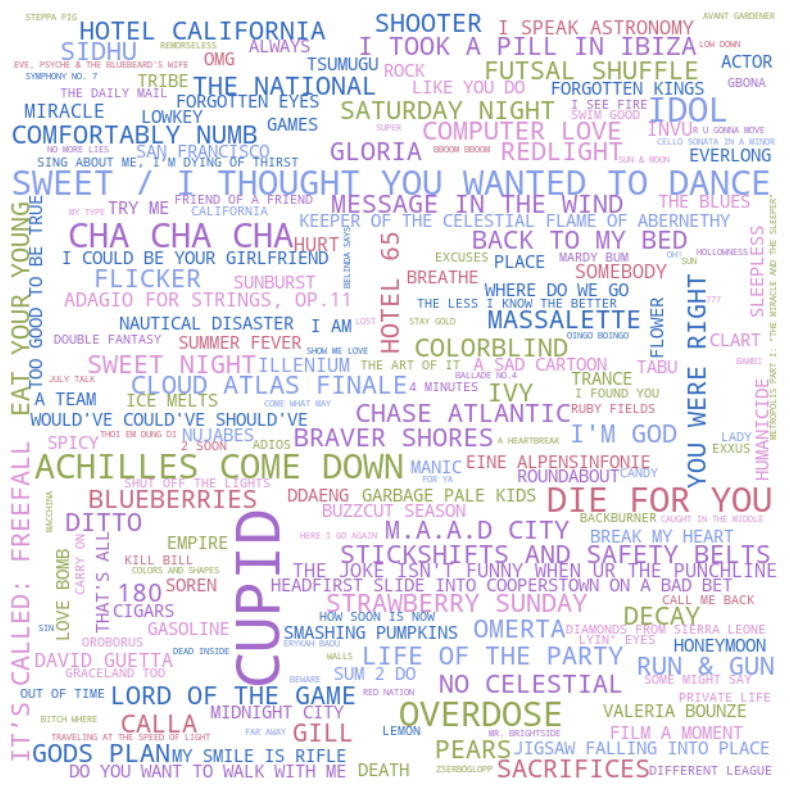

In [6]:
# extract data from related column
col_name = "What is your favourite song right now? (Please follow an \"Artist - Song Title\" format)"
fav_song_raw_data = df[col_name]

# clean up responses
fav_song_data = []

# get only the song names
for song in fav_song_raw_data:
    if isinstance(song, str):
        song_only = song.split('- ')[-1].strip()
        if song_only != song:
            fav_song_data.append(song_only)
            

# turn all strings into upper case
songs_caps = []

for song in fav_song_data:
    song = song.upper()
    songs_caps.append(song)

# count the frequency of each song
songs_counts = {}
for song in songs_caps:
    if song in songs_counts:
        songs_counts[song] += 1
    else:
        songs_counts[song] = 1

# remove all the "nan" entries
songs_counts['nan'] = 0
        
# create word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap=custom_palette).generate_from_frequencies(songs_counts)

# display word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It seems like UWaterloo students really love CUPID by FIFTY FIFTY!

## What are UW's favorite songs right now?

In [ ]:
# extract data from related column
col_name = "What is your favourite album right now? (Please follow an \"Artist - Album\" format)"
fav_album_raw_data = df[col_name]

# clean up responses
fav_album_data = []

# get only the album names
for album in fav_album_raw_data:
    if isinstance(album, str):
        album_only = album.split('- ')[-1].strip()
        if album != album_only:
            fav_album_data.append(album_only)


# turn all strings into upper case
albums_caps = []

for album in fav_album_data:
    album = album.upper()
    albums_caps.append(album)

# count the frequency of each album
albums_counts = {}
for album in albums_caps:
    if album in albums_counts:
        albums_counts[album] += 1
    else:
        albums_counts[album] = 1

# remove all the "nan" entries
albums_counts['nan'] = 0
        
# create word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white', 
                      colormap=custom_palette).generate_from_frequencies(albums_counts)

# display word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Fav Albums: Renaissance, Random Access Memories, Dawn FM, Evermore

## What genres of music does UW listen to?

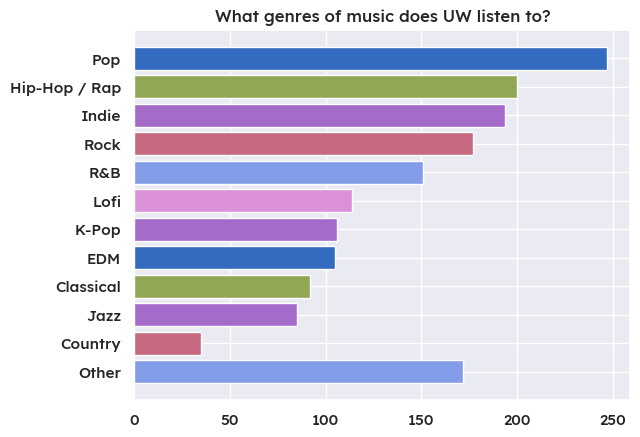

In [8]:
# extract data from related column
col_name = "What genres of music do you regularly listen to? (Please select all that apply)"
genres_raw_data = df[col_name]

# get a list of every single genre selected
genres_data = genres_raw_data.str.split(', ').explode().tolist()

# to keep track of genre counts
genre_counts = {
    'Other': 0,
    'Country': 0,
    'Jazz': 0,
    'Classical': 0,
    'EDM': 0,
    'K-Pop': 0,
    'Lofi': 0,
    'R&B': 0,
    'Rock': 0,
    'Indie': 0,
    'Hip-Hop / Rap': 0,
    'Pop': 0
}

# count genres
for genre in genres_data:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts['Other'] += 1


# create bar graph
keys = list(genre_counts.keys())
values = list(genre_counts.values())

plt.barh(keys, values, color=my_palette)
plt.title('What genres of music does UW listen to?')
plt.show()


The most listened to genre at UW is pop! Some of the most common 'Other' responses were metal, j-pop, and video game music!